In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209MI.txt'
#path = './data/line_1/20180414/20180414_F_1_L1.I_5209bMI.txt'
path = '../data/line_4/'
file = 'F_2_L45.I_S5209MI'
fileb = 'F_2_L45.I_S5209bMI'
filel = 'F_2_L45.I_S5202F02'
def loadData(path,file_name):
    alldata = []
    for i in os.listdir('../data/line_4'):
        
        path2 = path + i + '/' + i + '_' + file_name + '.txt'
        print(path2)
        f = open(path2) 
        data = json.load(f)
        alldata.extend(data[file_name])
    return alldata

In [2]:
t = loadData(path,file)
tb = loadData(path,fileb)
l = loadData(path,filel)

../data/line_4/20180414/20180414_F_2_L45.I_S5209MI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209MI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209MI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209MI.txt
../data/line_4/20180512/20180512_F_2_L45.I_S5209MI.txt
../data/line_4/20180519/20180519_F_2_L45.I_S5209MI.txt
../data/line_4/20180526/20180526_F_2_L45.I_S5209MI.txt
../data/line_4/20180602/20180602_F_2_L45.I_S5209MI.txt
../data/line_4/20180609/20180609_F_2_L45.I_S5209MI.txt
../data/line_4/20180616/20180616_F_2_L45.I_S5209MI.txt
../data/line_4/20180623/20180623_F_2_L45.I_S5209MI.txt
../data/line_4/20180630/20180630_F_2_L45.I_S5209MI.txt
../data/line_4/20180707/20180707_F_2_L45.I_S5209MI.txt
../data/line_4/20180714/20180714_F_2_L45.I_S5209MI.txt
../data/line_4/20180414/20180414_F_2_L45.I_S5209bMI.txt
../data/line_4/20180421/20180421_F_2_L45.I_S5209bMI.txt
../data/line_4/20180428/20180428_F_2_L45.I_S5209bMI.txt
../data/line_4/20180505/20180505_F_2_L45.I_S5209bMI.txt
../dat

In [3]:
data_t = pd.DataFrame(t)
data_tb = pd.DataFrame(tb)
data_l = pd.DataFrame(l)

In [4]:
data_l.value = pd.to_numeric(data_l.value, errors='ignore')
data_t.value = pd.to_numeric(data_t.value,errors = 'ignore')
data_tb.value = pd.to_numeric(data_tb.value,errors = 'ignore')

data_l = data_l[data_l['value']> 0]
data_t = data_t[data_t['value'] > 0]
data_tb = data_tb[data_tb['value'] > 0] 

In [5]:
new_ts_l = [data_l['ts'].iloc[i][0:13] for i in range(0,len(data_l))]
new_ts_tb = [data_tb['ts'].iloc[i][0:13] for i in range(0,len(data_tb))]
new_ts_t = [data_t['ts'].iloc[i][0:13] for i in range(0,len(data_t))]

In [6]:
data_t.drop('ts',axis=1, inplace=True)
data_tb.drop('ts',axis = 1,inplace = True)
data_l.drop('ts',axis = 1,inplace = True)

In [7]:
data_l.insert(1,'ts',new_ts_l)
data_t.insert(1,'ts',new_ts_t)
data_tb.insert(1,'ts',new_ts_tb)

In [8]:
grouped_l = data_l['value'].groupby(data_l['ts'])
grouped_t = data_t['value'].groupby(data_t['ts'])
grouped_tb = data_tb['value'].groupby(data_tb['ts']) 

In [9]:
d1 = grouped_l.mean()
d2 = grouped_t.mean()
d3 = grouped_tb.mean()

In [10]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)

In [11]:
data_1 =  pd.merge(d1,d2,left_index= True, right_index=True)

Text(0, 0.5, 'F_1_L1.I_5209MI_mean_value')

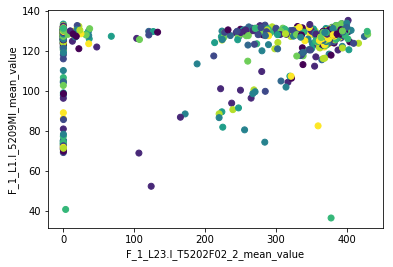

In [12]:
#电流a与流量反馈结果
import numpy as np
c=np.random.randint(0,10,len(data_1))
plt.scatter(data_1['value_x'],data_1['value_y'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2_mean_value')
plt.ylabel('F_1_L1.I_5209MI_mean_value')

In [15]:
s = data_1[data_1.index < '2018-05-01 ']
s2 = data_1[data_1.index < '2018-06-01 ']
s2 = s2[s2.index > '2018-05-01' ]
s3 = data_1[data_1.index < '2018-07-01 ']
s3 = s3[s3.index > '2018-06-01' ]
s4 = data_1[data_1.index < '2018-08-01 ']
s4 = s4[s4.index > '2018-07-01' ]

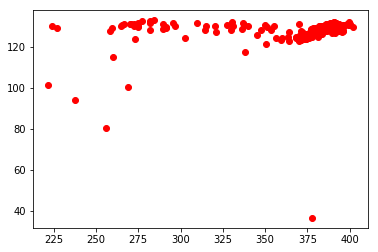

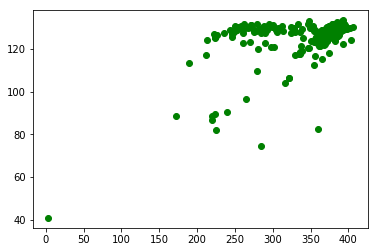

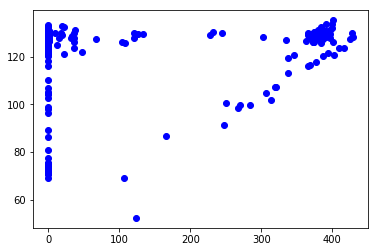

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

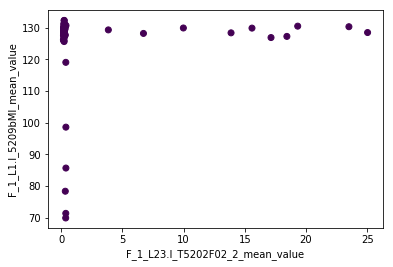

In [16]:
import numpy as np
c=np.random.randint(0,1,len(s))
c2=np.random.randint(0,1,len(s2))
c3=np.random.randint(0,1,len(s3))
c4=np.random.randint(0,1,len(s4))
plt.scatter(s['value_x'],s['value_y'],c = 'r',marker = 'o')
plt.show()
plt.scatter(s2['value_x'],s2['value_y'],c = 'g',marker = 'o')
plt.show()
plt.scatter(s3['value_x'],s3['value_y'],c = 'b',marker = 'o')

plt.show()
plt.scatter(s4['value_x'],s4['value_y'],c = c4,marker = 'o')

plt.xlabel('F_1_L23.I_T5202F02_2_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')

In [13]:
data_2 =  pd.merge(d1,d3,left_index= True, right_index=True)

Text(0, 0.5, 'F_1_L1.I_5209bMI_mean_value')

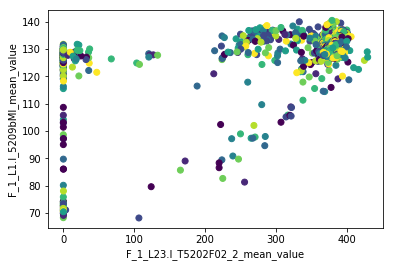

In [14]:
#电流b与流量反馈结果
import numpy as np
c=np.random.randint(0,10,len(data_2))
plt.scatter(data_2['value_x'],data_2['value_y'],c = c,marker = 'o')
plt.xlabel('F_1_L23.I_T5202F02_2_mean_value')
plt.ylabel('F_1_L1.I_5209bMI_mean_value')